In [1]:
import pandas as pd
import numpy as np


In [2]:
# load dataset
df = pd.read_csv("D:/Practicals/Bank Customer.csv")

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check for missing values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
# drop unnecessery columns

df.drop(columns=["customer_id"], inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert categorical columns to numerical
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

In [7]:
# One-Hot Encoding for 'country' column
df = pd.get_dummies(df, columns=["country"], drop_first=True)  # Drop first to avoid multicollinearity


In [8]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [9]:
# Scale numerical features
scaler = StandardScaler()
df[["credit_score", "age", "balance", "estimated_salary"]] = scaler.fit_transform(df[["credit_score", "age", "balance", "estimated_salary"]])


In [10]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,-0.326221,0,0.293517,2,-1.225848,1,1,1,0.021886,1,False,False
1,-0.440036,0,0.198164,1,0.117350,1,0,1,0.216534,0,False,True
2,-1.536794,0,0.293517,8,1.333053,3,1,0,0.240687,1,False,False
3,0.501521,0,0.007457,1,-1.225848,2,0,0,-0.108918,0,False,False
4,2.063884,0,0.388871,2,0.785728,1,1,1,-0.365276,0,False,True


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\yasir\AppData\Local\Temp\ipykernel_23948\2861973329.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="churn", data=df, palette="coolwarm")


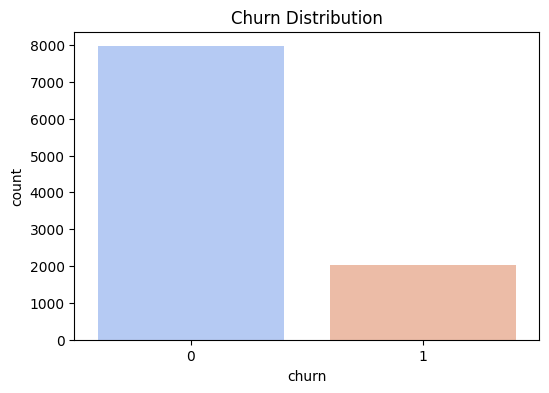

In [12]:
# Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="churn", data=df, palette="coolwarm")
plt.title("Churn Distribution")
plt.show()

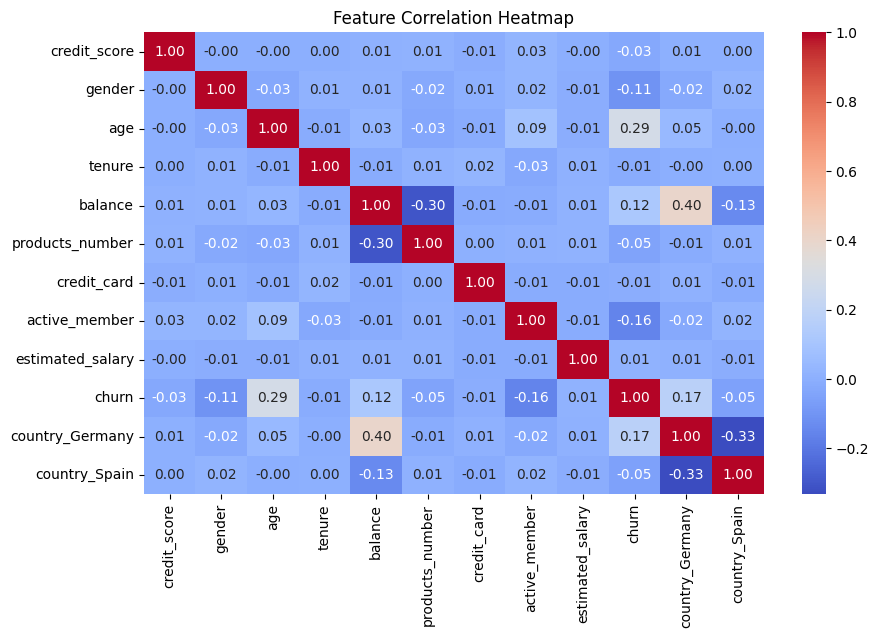

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


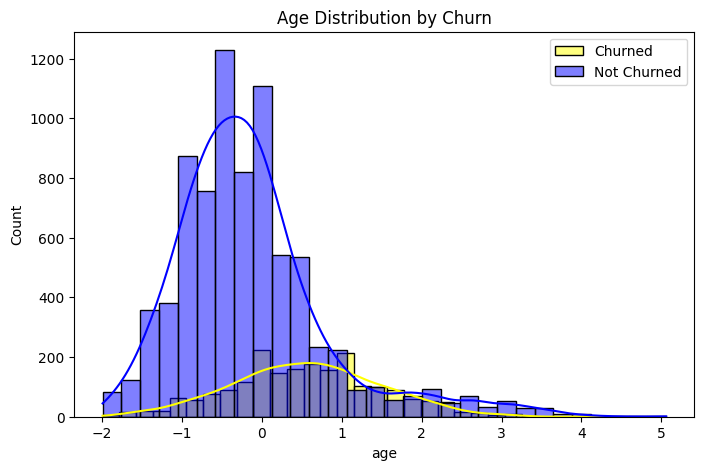

In [14]:
# Age Distribution by Churn
plt.figure(figsize=(8,5))
sns.histplot(df[df["churn"]==1]["age"], bins=30, kde=True, color="yellow", label="Churned")
sns.histplot(df[df["churn"]==0]["age"], bins=30, kde=True, color="blue", label="Not Churned")
plt.legend()
plt.title("Age Distribution by Churn")
plt.show()

## Code for Model Training

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split dataset
X = df.drop("churn", axis=1)
y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Accuracy Score
log_acc = accuracy_score(y_test, log_model.predict(X_test))
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Logistic Regression Accuracy: {log_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")


Logistic Regression Accuracy: 0.81
Random Forest Accuracy: 0.86


## 📌 Code for Model Evaluation

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate Random Forest Model
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_model.predict(X_test)))
print("Classification Report:\n", classification_report(y_test, rf_model.predict(X_test)))


Confusion Matrix:
 [[1545   62]
 [ 208  185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [35]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv("D:/Practicals/Bank Customer.csv")

# Assume these are the selected features and target
features = ["credit_score", "age", "balance", "estimated_salary", "tenure"]
target = "churn"

# Split data into training and testing sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Save the model and scaler
joblib.dump(model, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model saved successfully as churn_model.pkl")


✅ Model saved successfully as churn_model.pkl


In [31]:
print(df.columns)


Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')
